In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
 
import yfinance as yf
import warnings
warnings.filterwarnings("ignore")
 
plt.rcParams['figure.figsize'] = 15, 5

<Axes: xlabel='Date'>

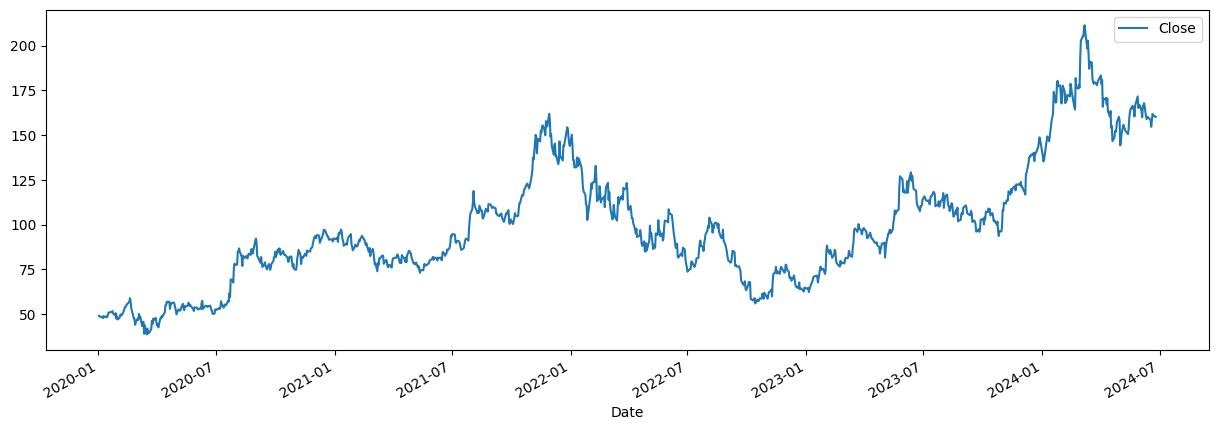

In [4]:
   
AMD = yf.Ticker("AMD")
 
# getting the historical market data
AMD_values = AMD.history(start="2020-01-01")
 
# Plotting the close price of AMD
AMD_values[['Close']].plot()

<Axes: xlabel='Date'>

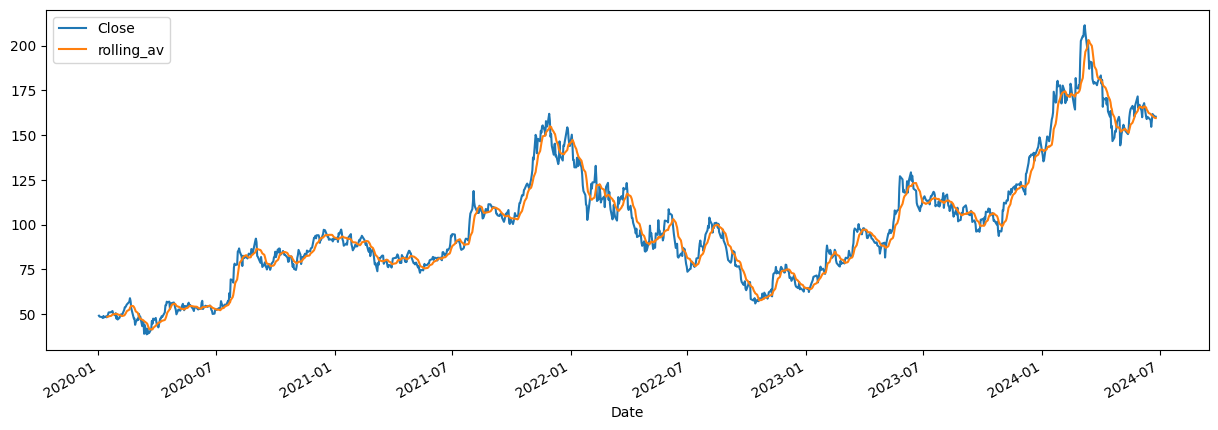

In [5]:
AMD_values['rolling_av'] = AMD_values['Close'].rolling(10).mean()
 
# plotting 10-day rolling average value with the closing value
AMD_values[['Close','rolling_av']].plot()

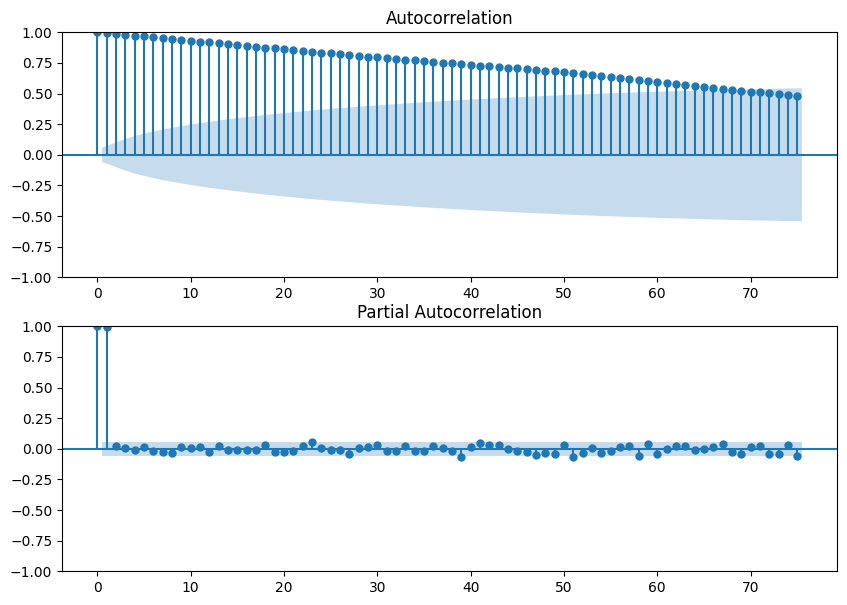

In [6]:

# Function to plot ACF and PACF
def plot_acf_pacf(timeseries):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 7))
    plot_acf(timeseries, ax=ax1, lags=75)
    plot_pacf(timeseries, ax=ax2, lags=75)
    plt.show()
 
 
# Plotting ACF and PACF of the closing value time series
plot_acf_pacf(AMD_values['Close'])

In [7]:
   
#creating the model
MA_model = ARIMA(endog=AMD_values['Close'], order=(0, 0, 55))
 
#fitting data to the model
results = MA_model.fit()
 
#summary of the model
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1127
Model:                ARIMA(0, 0, 55)   Log Likelihood               -4536.837
Date:                Wed, 26 Jun 2024   AIC                           9187.673
Time:                        10:06:41   BIC                           9474.230
Sample:                             0   HQIC                          9295.951
                               - 1127                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         98.4739     23.437      4.202      0.000      52.538     144.410
ma.L1          0.6475      0.770      0.841      0.401      -0.862       2.158
ma.L2          0.5981      0.816      0.733      0.4

In [10]:
#prediction data
start_date = '2023-12-15'
end_date   = '2024-06-25'
AMD_values['prediction'] = results.predict(start=start_date, end=end_date)
 
#printing last 14 values of the prediction with original and rolling avg value
print(AMD_values[['Close','rolling_av','prediction']].tail(14))

                                Close  rolling_av  prediction
Date                                                         
2024-06-05 00:00:00-04:00  166.169998  165.242000  153.550476
2024-06-06 00:00:00-04:00  166.779999  165.367999  156.298061
2024-06-07 00:00:00-04:00  167.869995  166.112000  157.700910
2024-06-10 00:00:00-04:00  160.339996  165.509999  159.675242
2024-06-11 00:00:00-04:00  158.960007  164.245000  155.722588
2024-06-12 00:00:00-04:00  160.240005  163.755000  153.901605
2024-06-13 00:00:00-04:00  159.899994  163.070000  153.734643
2024-06-14 00:00:00-04:00  159.630005  162.343001  153.314421
2024-06-17 00:00:00-04:00  158.399994  161.828000  152.521965
2024-06-18 00:00:00-04:00  154.630005  161.292000  151.023257
2024-06-20 00:00:00-04:00  161.779999  160.853000  147.552374
2024-06-21 00:00:00-04:00  161.229996  160.298000  151.767234
2024-06-24 00:00:00-04:00  160.250000  159.536000  152.977382
2024-06-25 00:00:00-04:00  160.250000  159.527000  152.870816


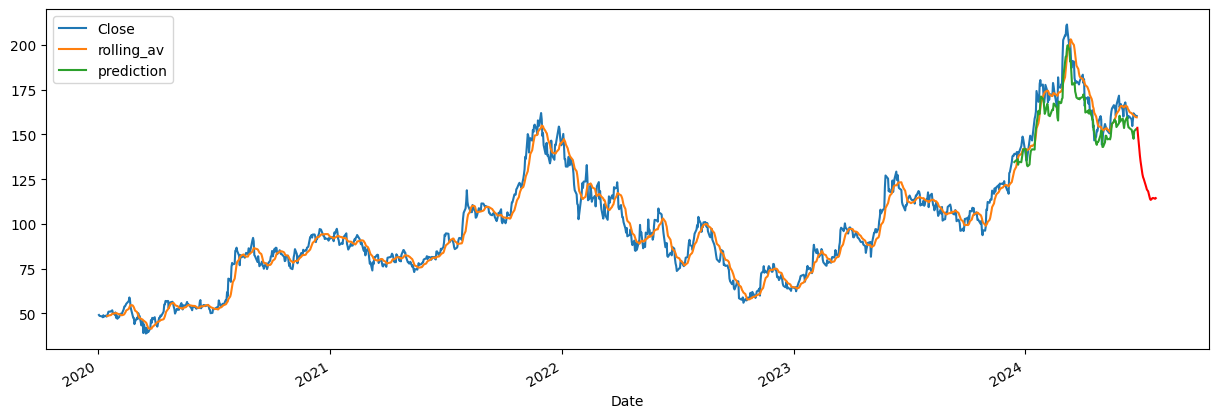

In [11]:
# Forecast future values
# Forecast future closing prices
forecast_steps = 30  # Forecasting for the next 30 days
forecast_index = pd.date_range(start=AMD_values['Close'].index[-1], periods=forecast_steps+1, freq='D')[1:]  # Generate datetime index for forecast
forecast = results.forecast(steps=forecast_steps)
 
# plotting the end results
AMD_values[['Close','rolling_av','prediction']].plot()
plt.plot(forecast_index, forecast, color='red', label='Forecast')